This is notebook is my first attempt to browse and visualize the data in the Microsoft Spam Database.

In [1]:
# code borrowed from used from: https://www.kaggle.com/datark1/malware-prediction-eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("C:/Users/Shahram/Desktop/Microsoft Spam/"))

['train.csv']


In [2]:
# code borrowed from: https://www.kaggle.com/datark1/malware-prediction-eda
# the train.CSV file is almost 4GB. This section of the code read the csv file in chunks.
chunksize = 10000
train = None

for chunk in pd.read_csv("C:/Users/Shahram/Desktop/Microsoft Spam/train.csv", chunksize=chunksize, iterator=True, low_memory = False):
    if train is None:
        train=chunk.copy()
    else:
        train.append(chunk)

In [3]:
# Look at the first few rows:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [4]:
# to see the number of rows and columns
train.shape

(10000, 83)

There is 10000 rows and 83 column. For some reason it did not load all the rows. I am not going to pursue why I could not load all the data yet.

In [5]:
# Let's take a look at the columns
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [6]:
#checking the types of each column
train.dtypes

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
                                            ...   
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnectedCapable    float64
Wdft_IsGamer                               float64
Wdft_RegionIdentifier                      float64
HasDetections                                int64
Length: 83, dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
MachineIdentifier                                    10000 non-null object
ProductName                                          10000 non-null object
EngineVersion                                        10000 non-null object
AppVersion                                           10000 non-null object
AvSigVersion                                         10000 non-null object
IsBeta                                               10000 non-null int64
RtpStateBitfield                                     9966 non-null float64
IsSxsPassiveMode                                     10000 non-null int64
DefaultBrowsersIdentifier                            472 non-null float64
AVProductStatesIdentifier                            9970 non-null float64
AVProductsInstalled                                  9970 non-null float64
AVProductsEnabled                                    9970 non-null flo

In [8]:
# Let's look at the overview of all the data . This can show use the number of counts in all numerical data.
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,10000.0,9966.000000,10000.000000,472.000000,9970.000000,9970.000000,9970.000000,10000.000000,10000.000000,9617.000000,...,9815.000000,10000.000000,3639.0,9983.000000,10000.000000,10000.0000,9922.000000,9691.000000,9691.000000,10000.000
mean,0.0,6.842364,0.017800,1585.576271,47816.197894,1.316951,1.019157,0.988900,109.487500,81116.637205,...,32870.960978,0.481600,0.0,0.007613,0.119100,0.0358,0.056541,0.282221,7.863482,0.505
std,0.0,1.034253,0.132231,963.624211,14070.304518,0.516013,0.163146,0.104775,62.980792,49074.620573,...,21156.297631,0.499686,0.0,0.086924,0.323922,0.1858,0.230975,0.450103,4.594118,0.500
min,0.0,0.000000,0.000000,10.000000,39.000000,1.000000,0.000000,0.000000,1.000000,41.000000,...,727.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000
25%,0.0,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36360.000000,...,12950.500000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,3.000000,0.000
50%,0.0,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,10.000000,1.000
75%,0.0,7.000000,0.000000,2170.000000,53447.000000,2.000000,1.000000,1.000000,164.000000,124641.000000,...,52342.000000,1.000000,0.0,0.000000,0.000000,0.0000,0.000000,1.000000,11.000000,1.000
max,0.0,8.000000,1.000000,3195.000000,70262.000000,5.000000,4.000000,1.000000,222.000000,167886.000000,...,72070.000000,1.000000,0.0,1.000000,1.000000,1.0000,1.000000,1.000000,15.000000,1.000


In [9]:
print ("The product are", train.ProductName.unique())
print ("There are", len (train.EngineVersion.unique()), "distinct version of these two products.")

The product are ['win8defender' 'mse']
There are 36 distinct version of these two products.


In [10]:
# Let's see which clumns are binary:
# wrote the code myself but got help from https://www.kaggle.com/datark1/malware-prediction-eda
BinaryColumns = []
for column in train.select_dtypes (include = ['float', 'int']):
    if train [column].min() == 0  or train[column].max() ==1:
        BinaryColumns.append (column)
        #print (column)
print ('There are', len(BinaryColumns),'columns which are Binary.')
BinaryColumns

There are 14 columns which are Binary.


['RtpStateBitfield',
 'AVProductsEnabled',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_InternalBatteryNumberOfCharges',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

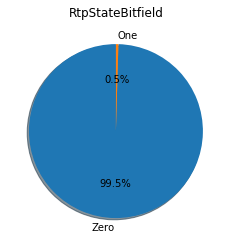

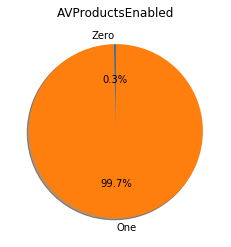

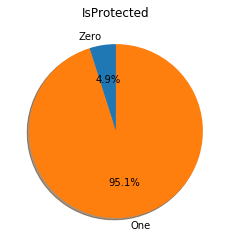

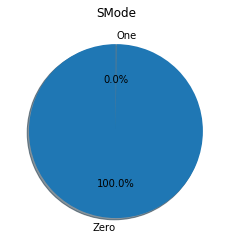

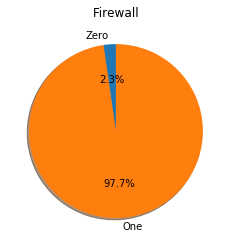

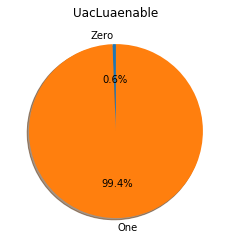

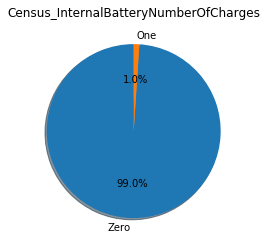

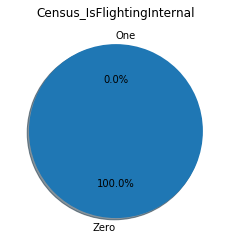

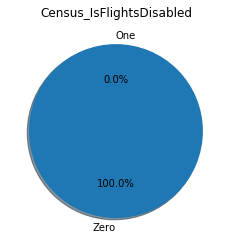

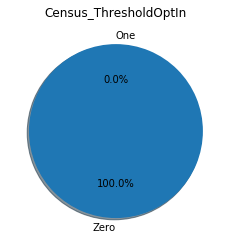

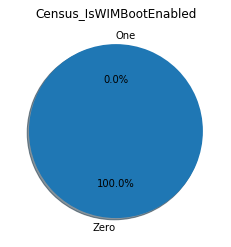

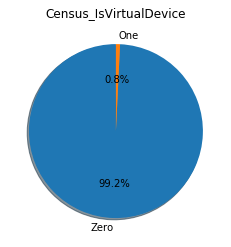

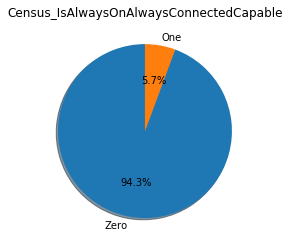

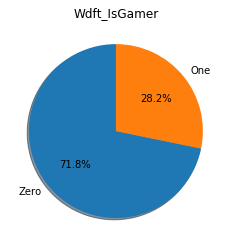

In [28]:
# Let's visually look at the percentage of zeros and ones in Digital columns.
for i in BinaryColumns:
    Zero = (train[i]==0).sum()
    One = (train[i]==1).sum()
    sizes = [Zero,One]
    labels = ['Zero','One']
    fig1, ax1 = plt.subplots()
    plt.title(i, fontdict=None, loc='center', pad=None)
    ax1.pie(sizes, labels = labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.show()